In [1]:
import json
import projetannuel

with open("../dataset/images_flat_2.json", "r") as dataset:
    data = json.load(dataset)
    
imgs_as_lists = [movie["image"] for movie in data]
genres = [movie["genre"] for movie in data]

In [3]:
import projetannuel

y = projetannuel.string_labels(genres)

model = projetannuel.LinearModel(
    imgs_as_lists,
    y
)

In [ ]:
model.train_classification(epochs=10_000, learning_rate=0.001)

Ici ça passe


In [ ]:
y_pred = []
for img in imgs_as_lists:
    y_pred.append(model.predict(img))

In [ ]:
print(y_pred)

['Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Animation', 'Horreur', 'Animation', 'Animation', 'Animation', 'Horreur', 'Horreur', 'Animation', 'Animat

In [ ]:
projetannuel.accuracy_score(genres, y_pred)

0.5716666666666667

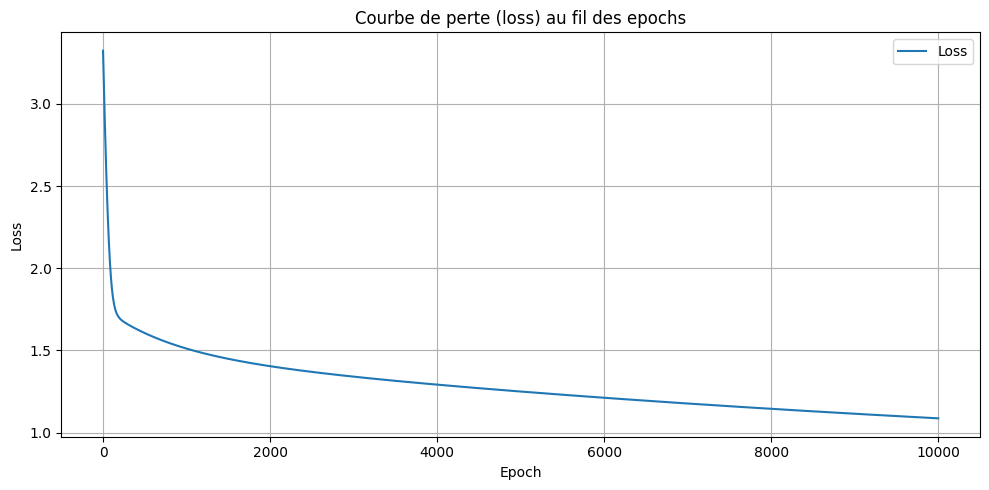

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(model.loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe de perte (loss) au fil des epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## MLP

In [11]:
genres_binary = [[0] if x=="Animation" else [1] for x in genres]
len(genres_binary)

1200

In [12]:
import projetannuel as pa
model = pa.MLP([6, 4, 1])
model.train(imgs_as_lists,genres_binary,1_000_000,0.01,True)
y_pred = [model.predict(x,True)[0] for x in imgs_as_lists]

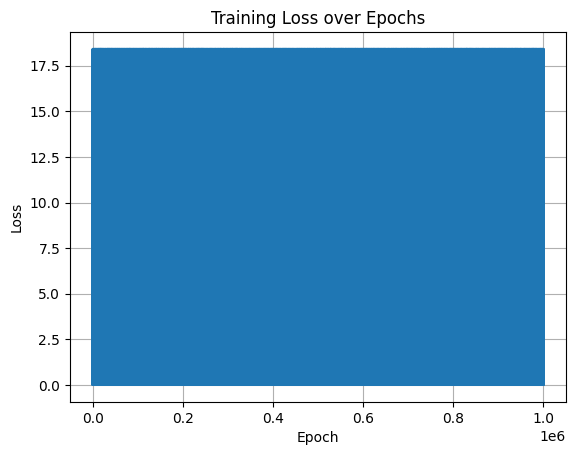

In [13]:
import matplotlib.pyplot as plt

# noraml car affiche pas par epochs

loss = model.loss  
epochs = list(range(1, len(loss) + 1))

plt.plot(epochs, loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()


In [14]:
genres_binary_2 = [x[0] for x in genres_binary]

In [15]:
print(y_pred)

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.

In [16]:
y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred.count(1)

0

In [17]:
pa.accuracy_score(genres_binary_2, y_pred)

0.5